# 3. Neural network

### 1. numpy, matplotlib 모듈 임포트

In [3]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 

### 2. 활성화 함수(Activation function)
각각의 메서드 실행의 결과 출력을 도와주는 메서드

### 2-1. 계단 함수

In [4]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

결과 및 그래프 확인

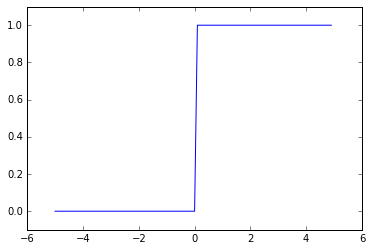

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### 2-2. 시그모이드 함수

#### 시그모이드 함수 수식

$h(x) = {1\over{1+\exp(-x)}}$

*참고: exp는 자연상수 2.7182...*

#### python 메서드 정의

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

결과 및 그래프 확인

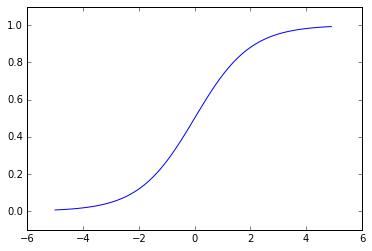

In [18]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### 2-3. 계단 함수와 시그모이드 함수 비교

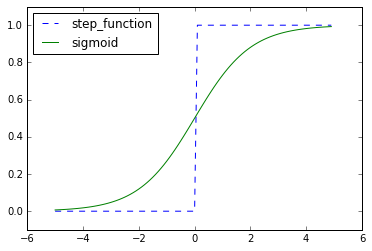

In [26]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)

plt.plot(x,y1, b'--', label='step_function')
plt.plot(x,y2, b'-', label='sigmoid')
plt.ylim(-0.1, 1.1)
plt.legend(loc='upper left')
plt.show()

#### 공통점
* 대체적으로는 같은 모양
    * 둘다 입력이 작을 때는 출력이 0에 가깝고
    * 둘다 입력이 클 때는 출력이 1에 가깝다.
* 입력이 아무리 크거나 작더라도 출력은 0과 1사이다.
    
#### 차이점
* 선의 모양
    * 계단 함수는 0을 기준으로 출력이 급격히 변경되나,
    * 시그모이드 함수의 경우 매끄러운 형태를 보인다.
* 출력값
    * 계단 함수는 0과 1만 출력
    * 시그모이드 함수는 0에서 1사이의 실수를 출력한다.

### 4.  손글자 숫자 인식

In [39]:
import numpy as np
import pickle
from dataset.mnist import load_mnist
from PIL import Image

In [21]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [9]:
# 최초 1회만 다운로드.
# 그 이후에는 pickle 사용으로 바로 로딩됨
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


[결과]

In [15]:
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

5
(784,)
(28, 28)


In [24]:
img_show(img)

In [42]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(
        normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [47]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt / len(x))))

Accuracy:0.9352


[결과]

In [10]:
inputs = ([0,0], [0,1], [1,0], [1,1])
print_result(XOR, inputs)

XOR(0,0) : 0
XOR(0,1) : 1
XOR(1,0) : 1
XOR(1,1) : 0
